In [1]:
## import data ##
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import matplotlib.cm as cm
import matplotlib.dates as mdates

import pandas as pd
import time

In [2]:
data = pd.DataFrame.from_csv("./data/ModifyCrime.csv")
data.head(1)

,Date,IUCR,Primary Type,Description,Beat,District,Ward,Community Area,Year
DateIdx,,,,,,,,,
2005-02-01,02/01/2005 07:00:00 AM,1320,CRIMINAL DAMAGE,TO VEHICLE,2511,25.0,36.0,18.0,2005


In [3]:
data = data.sort_index()

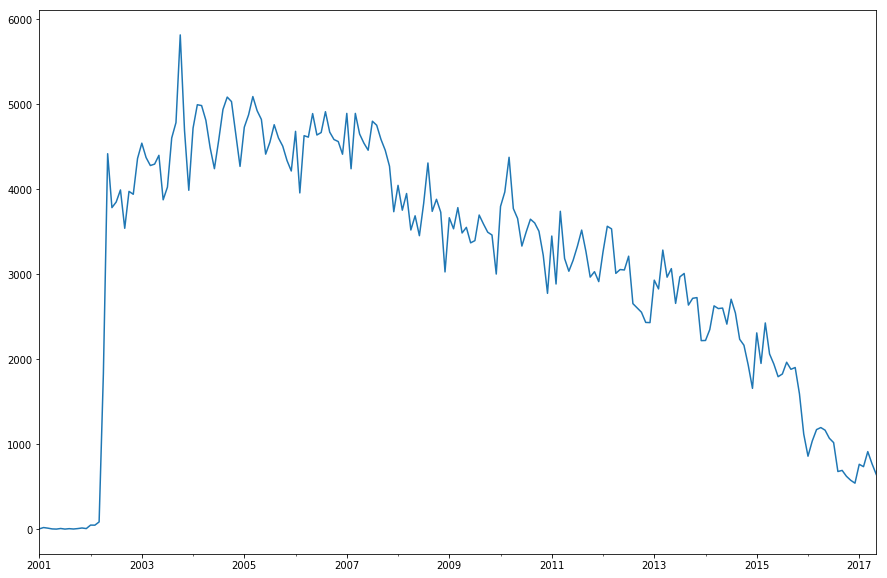

In [4]:
narcotics = data[data['Primary Type']=="NARCOTICS"]
#plot the trend
a = narcotics.index.value_counts().sort_index()
a.plot()

In [5]:
rcParams['figure.figsize'] = 15, 6

In [6]:
new_group = narcotics.groupby('Beat').get_group(1112)

In [7]:
a = new_group.index.value_counts().sort_index()

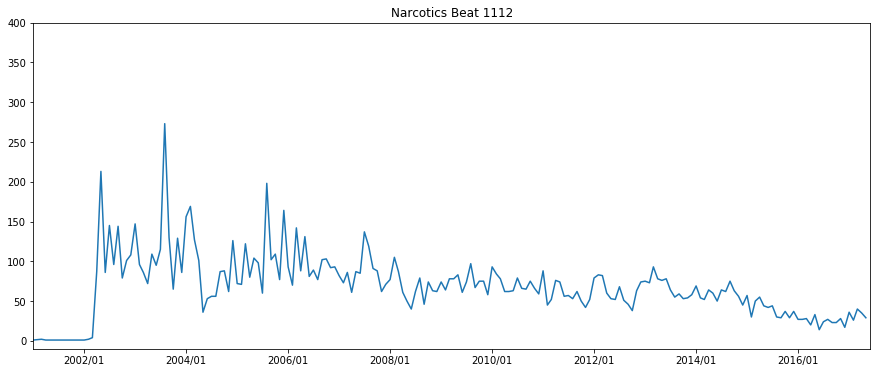

In [8]:
formate = "%Y-%m-%d"
obj1 = time.strptime("2001-01-01", formate)
obj2 = time.strptime("2017-06-01", formate)
x_s = time.strftime("%Y-%m",obj1)
x_e = time.strftime("%Y-%m",obj2)
times = pd.date_range('2001-01-01', periods=204, freq='M')
fig, ax = plt.subplots(1)
plt.plot(a)
xfmt = mdates.DateFormatter('%Y/%m')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Narcotics Beat %s' %1112)
plt.ylim((-10,400))
plt.xlim((x_s,x_e))
plt.show()

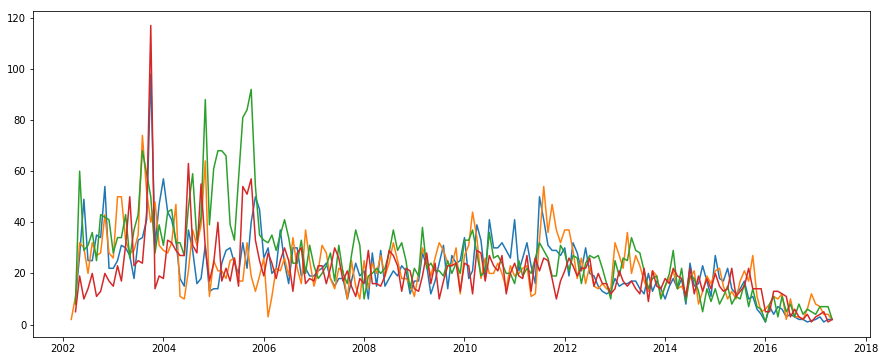

In [9]:
groupbeat = narcotics.groupby('Beat')
prev = 111
times = pd.date_range('2001-01-01', periods=204, freq='M')
fig, ax = plt.subplots(1)
lengend = []
for i in sorted(narcotics['Beat'].unique()):
    new_group = groupbeat.get_group(prev)
    a = new_group.index.value_counts().sort_index()
    
    plt.plot(a)
    lengend.append(prev)
    
    if(prev//10 != i//10):
        
        xfmt = mdates.DateFormatter('%Y/%m')
        ax.xaxis.set_major_formatter(xfmt)
        plt.legend(lengend, loc='upper right')
        
        lengend = []
        
        plt.title('Narcotics Beat %sx' %(prev//10))
        plt.ylim((-10,400))
        plt.xlim((x_s,x_e))
        #plt.show()
        file_name = './report_img/a'+str(prev//10) + '.png'
        pylab.savefig(file_name)
        plt.close()
        #break
    prev = i